In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
pf = pd.read_csv('./performance.csv')
pf.columns = ['name', 'left_skewed', 'normal', 'right_skewed', 'sorted']

In [11]:
pf

,name,left_skewed,normal,right_skewed,sorted
0,KMV,1075,1087,1075,1087
1,LogLog,1129,1129,1129,1129
2,LinearCounting,975,975,975,975
3,HyperLogLog,844,852,844,852
4,HyperLogLog+,1001,1002,1001,1002
5,FM,896,896,896,896
6,BJKST,1000,1001,1000,1001
7,AMS,1024,1024,1024,1024
8,AdaptiveCounting,1000,1001,1000,1001
9,BloomFilter,996,997,996,997


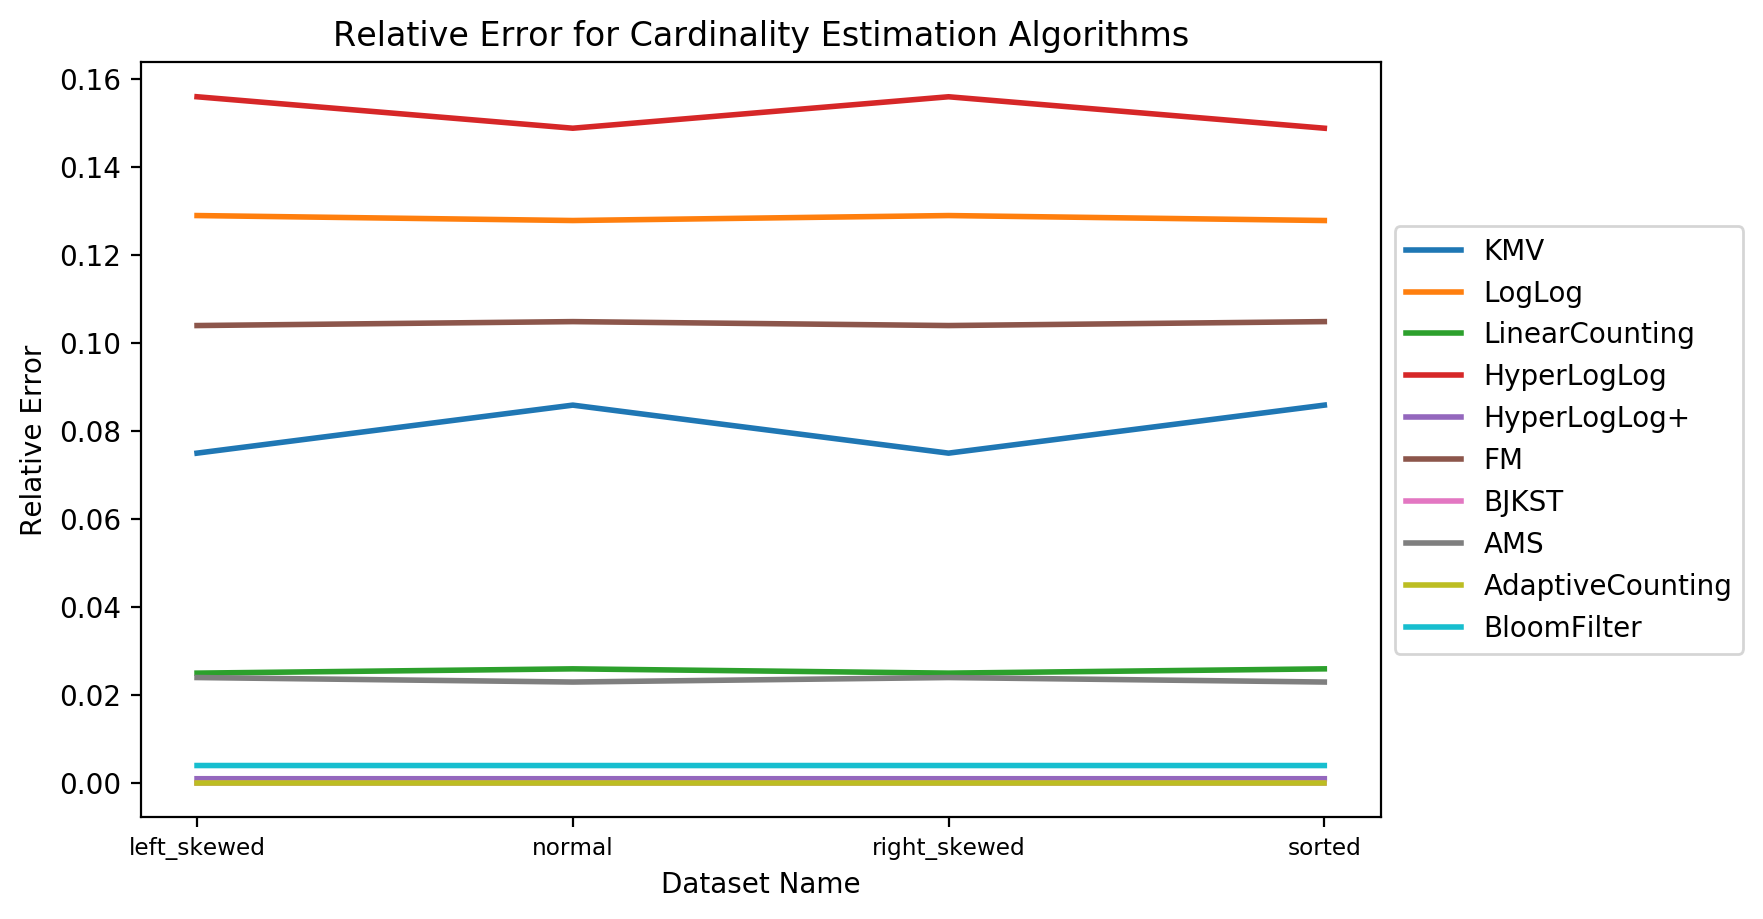

In [12]:
names = pf['name'].tolist()
datasets = ['name', 'left_skewed', 'normal', 'right_skewed', 'sorted']

fig = plt.figure(figsize=(8,5), dpi=200)
ax=fig.add_subplot(1,1,1)
yt = [1000, 1001, 1000, 1001]
plt.title('Relative Error for Cardinality Estimation Algorithms')
for line in range(pf.shape[0]):
    x = [1, 2, 3, 4]
    yp = pf.iloc[line, 1:]
    y = []
    for i in range(len(yp)):
        y.append(abs(yp[i]/yt[i] - 1))
    plt.plot(x, y, linewidth=2, label=pf.iloc[line, 0])

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(datasets[1:], fontsize="small")
ax.set_xlabel("Dataset Name")
ax.set_ylabel("Relative Error")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [55]:
pf = pf.sort_values(['left_skewed'],  ascending=False)

In [56]:
pf

,name,left_skewed,normal,right_skewed,sorted
1,LogLog,1129,1129,1129,1129
0,MKV,1075,1087,1075,1087
7,AMS,1024,1024,1024,1024
4,HyperLogLog+,1001,1002,1001,1002
6,BJKST,1000,1001,1000,1001
8,AdaptiveCounting,1000,1001,1000,1001
9,CountAndEstimate,1000,1001,1000,1001
2,LinearCounting,975,975,975,975
5,FM,896,896,896,896
3,HyperLogLog,844,852,844,852


In [65]:
pf1 = pf.copy()
pf1['left_skewed'] = abs(pf1['left_skewed']/1000-1)
pf1['normal'] = abs(pf1['normal']/1001-1)
pf1['right_skewed'] = abs(pf1['right_skewed']/1000-1)
pf1['sorted'] = abs(pf1['sorted']/1001-1)

In [68]:
pf1 = pf1.sort_values('left_skewed')
pf1

,name,left_skewed,normal,right_skewed,sorted
6,BJKST,0.000,0.000000,0.000,0.000000
8,AdaptiveCounting,0.000,0.000000,0.000,0.000000
9,CountAndEstimate,0.000,0.000000,0.000,0.000000
4,HyperLogLog+,0.001,0.000999,0.001,0.000999
7,AMS,0.024,0.022977,0.024,0.022977
2,LinearCounting,0.025,0.025974,0.025,0.025974
0,MKV,0.075,0.085914,0.075,0.085914
5,FM,0.104,0.104895,0.104,0.104895
1,LogLog,0.129,0.127872,0.129,0.127872
3,HyperLogLog,0.156,0.148851,0.156,0.148851


In [75]:
pf1

,name,left_skewed,normal,right_skewed,sorted
6,BJKST,0.000,0.000000,0.000,0.000000
8,AdaptiveCounting,0.000,0.000000,0.000,0.000000
9,CountAndEstimate,0.000,0.000000,0.000,0.000000
4,HyperLogLog+,0.001,0.000999,0.001,0.000999
7,AMS,0.024,0.022977,0.024,0.022977
2,LinearCounting,0.025,0.025974,0.025,0.025974
0,MKV,0.075,0.085914,0.075,0.085914
5,FM,0.104,0.104895,0.104,0.104895
1,LogLog,0.129,0.127872,0.129,0.127872
3,HyperLogLog,0.156,0.148851,0.156,0.148851


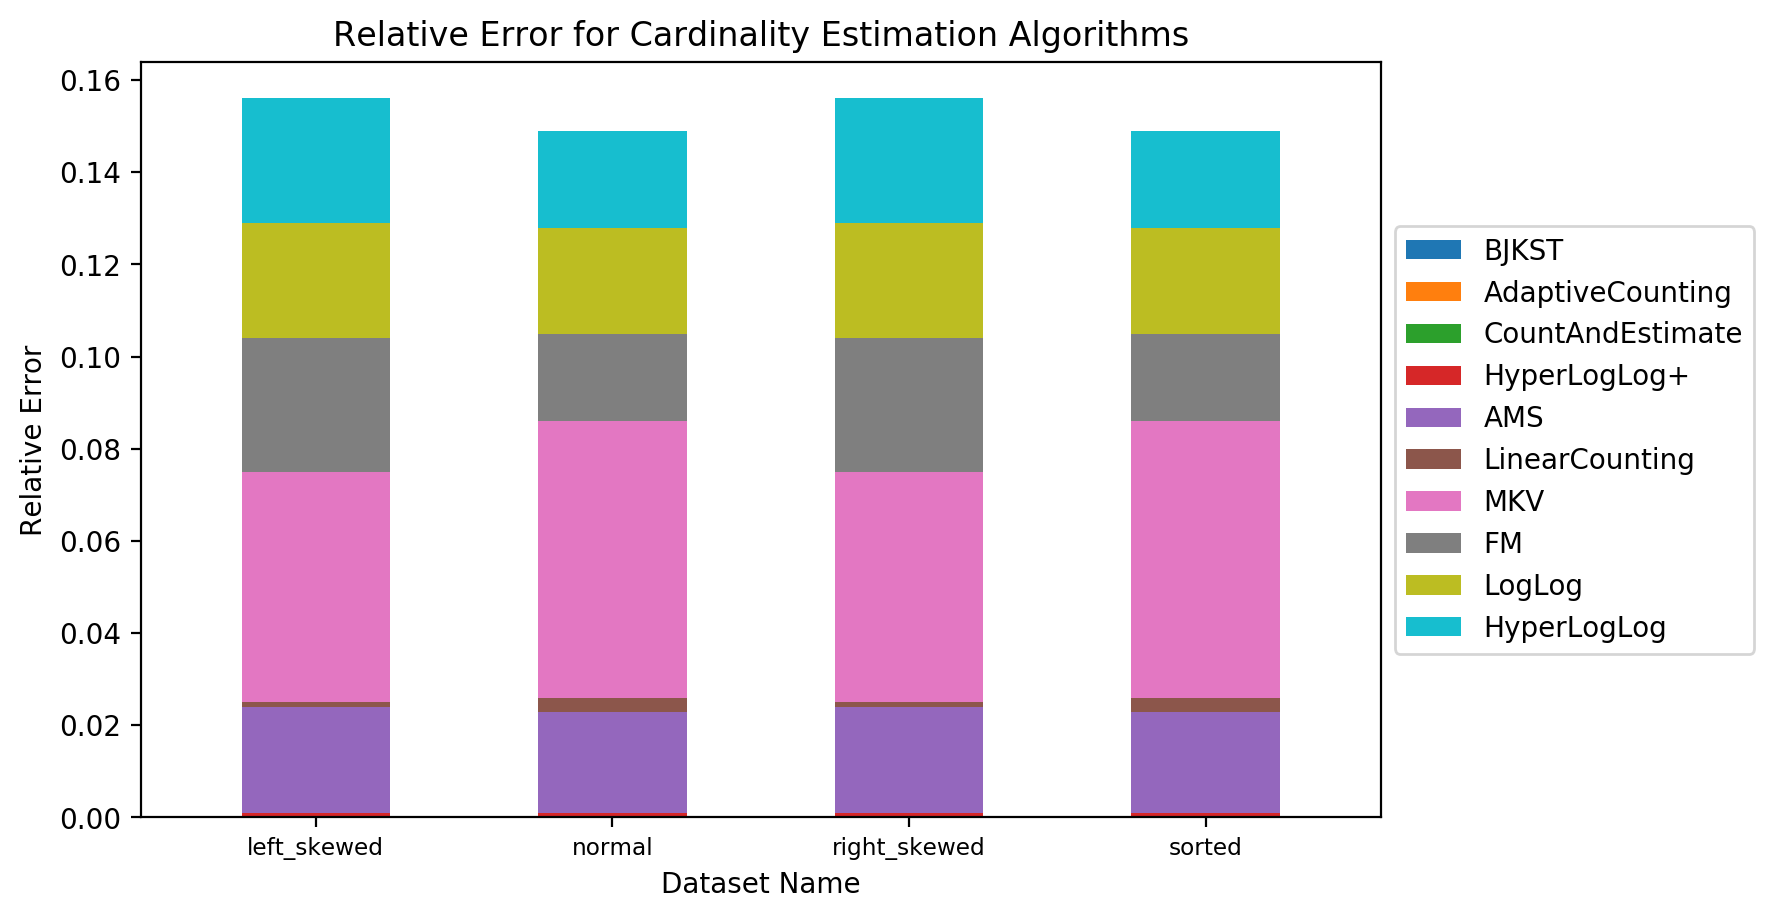

In [84]:
names = pf1['name'].tolist()
datasets = ['name', 'left_skewed', 'normal', 'right_skewed', 'sorted']

fig = plt.figure(figsize=(8,5), dpi=200)
ax=fig.add_subplot(1,1,1)
yt = [1000, 1001, 1000, 1001]
plt.title('Relative Error for Cardinality Estimation Algorithms')
lines = np.array([])
for line in range(pf1.shape[0]):
    x = [1, 2, 3, 4]
    y = pf1.iloc[line, 1:]
    
    if len(lines) == 0:
        plt.bar(x, y, label=pf1.iloc[line, 0])
    else:
        yp = np.array(y)-lines
        plt.bar(x, yp, bottom=lines, width=0.5, label=pf1.iloc[line, 0])
    lines = np.array(y)

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(datasets[1:], fontsize="small")
ax.set_xlabel("Dataset Name")
ax.set_ylabel("Relative Error")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [85]:
pf2 = pf1.T
pf2.columns = pf2.iloc[0, :]
pf2 = pf2.iloc[1:, :]
pf2.sort_values([])

In [109]:
pf2 = pf2.sort_values(['HyperLogLog'])

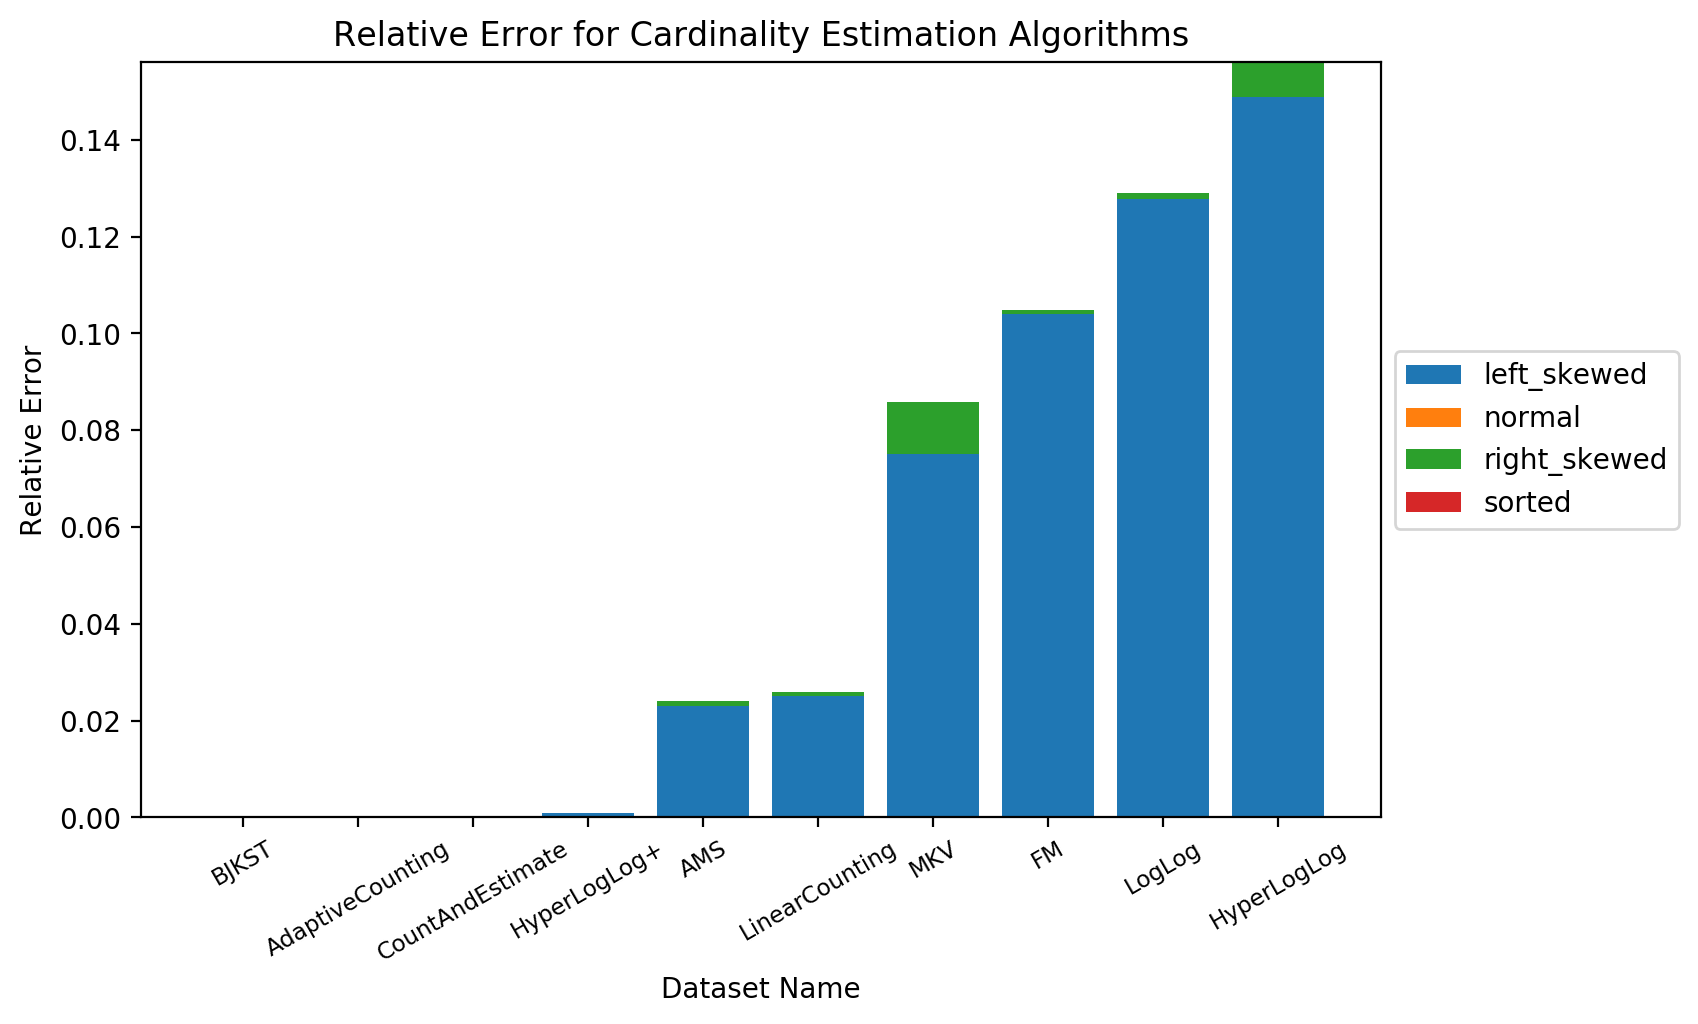

In [110]:
names = pf1['name'].tolist()
datasets = ['name', 'left_skewed', 'normal', 'right_skewed', 'sorted']

fig = plt.figure(figsize=(8,5), dpi=200)
ax=fig.add_subplot(1,1,1)
yt = [1000, 1001, 1000, 1001]
plt.title('Relative Error for Cardinality Estimation Algorithms')
lines = np.array([])
for line in range(pf2.shape[0]):
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    y = pf2.iloc[line, :]
    if len(lines) == 0:
        plt.bar(x, y, label=datasets[line+1])
    else:
        yp = np.array(y)-lines
        plt.bar(x, yp, bottom=lines, label=datasets[line+1])
    lines = np.array(y)

ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels(pf1['name'].tolist(), rotation=30,fontsize="small")
ax.set_xlabel("Dataset Name")
ax.set_ylabel("Relative Error")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

counts = []
count = -1
thefilepath = '/Users/siyuangao/Documents/workspace/Python/project/data/left_skewed.csv'
for count, line in enumerate(open(thefilepath, 'rU')):
    pass
count += 1
counts.append(count)

count = -1
thefilepath = '/Users/siyuangao/Documents/workspace/Python/project/data/normal.csv'
for count, line in enumerate(open(thefilepath, 'rU')):
    pass
count += 1
counts.append(count)

count = -1
thefilepath = '/Users/siyuangao/Documents/workspace/Python/project/data/right_skewed.csv'
for count, line in enumerate(open(thefilepath, 'rU')):
    pass
count += 1
counts.append(count)

count = -1
thefilepath = '/Users/siyuangao/Documents/workspace/Python/project/data/sorted.csv'
for count, line in enumerate(open(thefilepath, 'rU')):
    pass
count += 1
counts.append(count)

In [20]:
# dataset size info
counts

[18000000, 18000000, 18000000, 18000000]

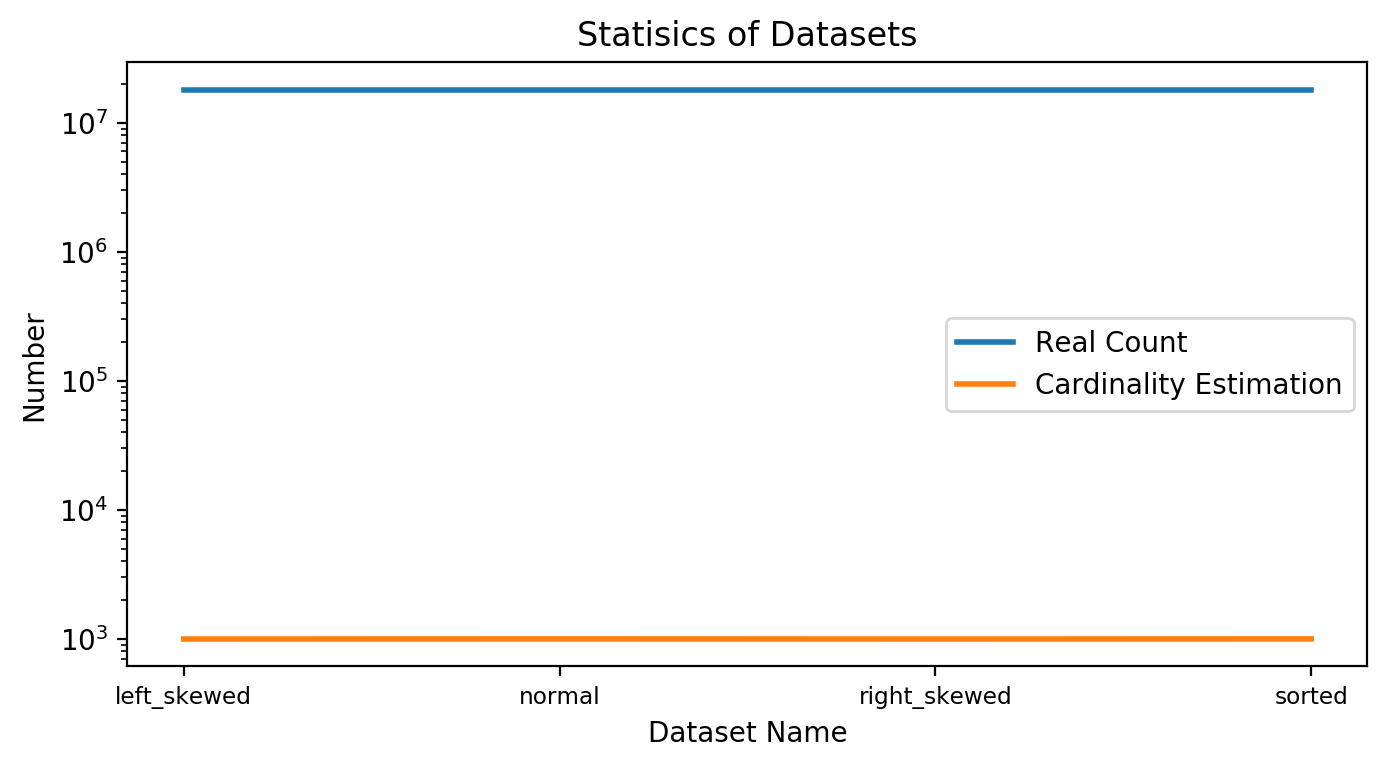

In [19]:
names = pf['name'].tolist()
datasets = ['name', 'left_skewed', 'normal', 'right_skewed', 'sorted']

fig = plt.figure(figsize=(8,4), dpi=200)
ax=fig.add_subplot(1,1,1)
yt = [1000, 1001, 1000, 1001]
plt.title('Statisics of Datasets')

x = [1, 2, 3, 4]

plt.plot(x, counts, linewidth=2, label='Real Count')
plt.plot(x, yt, linewidth=2, label='Cardinality Estimation')

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(datasets[1:], fontsize="small")
ax.set_xlabel("Dataset Name")
ax.set_ylabel("Number")
ax.set_yscale('log')
ax.legend(loc='center right')